# Major Research Project-Data Analysis

### Md Mozahidur Rahman - 501002626

In [28]:
# Library
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import seaborn as sns
sns.set_style("whitegrid")
from matplotlib import pyplot

### Data load

In [29]:
#Test.csv is a shorter version of dataset created from DataCoSupplyChainDataset.csv 
#df=pd.read_csv('Test.csv')
# DataCoSupplyChainDataset.csv is main dataset
df=pd.read_csv('DataCoSupplyChainDataset.csv',encoding= 'unicode_escape')
df.head()

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,...,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,2/3/2018 22:56,Standard Class
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/18/2018 12:27,Standard Class
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/17/2018 12:06,Standard Class
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/16/2018 11:45,Standard Class
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/15/2018 11:24,Standard Class


# Data Analysis & Prepocessing

In [30]:
df.shape

(180519, 53)

In [31]:
df.columns

Index(['Type', 'Days for shipping (real)', 'Days for shipment (scheduled)',
       'Benefit per order', 'Sales per customer', 'Delivery Status',
       'Late_delivery_risk', 'Category Id', 'Category Name', 'Customer City',
       'Customer Country', 'Customer Email', 'Customer Fname', 'Customer Id',
       'Customer Lname', 'Customer Password', 'Customer Segment',
       'Customer State', 'Customer Street', 'Customer Zipcode',
       'Department Id', 'Department Name', 'Latitude', 'Longitude', 'Market',
       'Order City', 'Order Country', 'Order Customer Id',
       'order date (DateOrders)', 'Order Id', 'Order Item Cardprod Id',
       'Order Item Discount', 'Order Item Discount Rate', 'Order Item Id',
       'Order Item Product Price', 'Order Item Profit Ratio',
       'Order Item Quantity', 'Sales', 'Order Item Total',
       'Order Profit Per Order', 'Order Region', 'Order State', 'Order Status',
       'Order Zipcode', 'Product Card Id', 'Product Category Id',
       'Product De

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Data columns (total 53 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Type                           180519 non-null  object 
 1   Days for shipping (real)       180519 non-null  int64  
 2   Days for shipment (scheduled)  180519 non-null  int64  
 3   Benefit per order              180519 non-null  float64
 4   Sales per customer             180519 non-null  float64
 5   Delivery Status                180519 non-null  object 
 6   Late_delivery_risk             180519 non-null  int64  
 7   Category Id                    180519 non-null  int64  
 8   Category Name                  180519 non-null  object 
 9   Customer City                  180519 non-null  object 
 10  Customer Country               180519 non-null  object 
 11  Customer Email                 180519 non-null  object 
 12  Customer Fname                

In [33]:
df[df.duplicated()].shape

(0, 53)

In [34]:
df.apply(lambda x: sum(x.isnull())) #Checking missing values

Type                                  0
Days for shipping (real)              0
Days for shipment (scheduled)         0
Benefit per order                     0
Sales per customer                    0
Delivery Status                       0
Late_delivery_risk                    0
Category Id                           0
Category Name                         0
Customer City                         0
Customer Country                      0
Customer Email                        0
Customer Fname                        0
Customer Id                           0
Customer Lname                        8
Customer Password                     0
Customer Segment                      0
Customer State                        0
Customer Street                       0
Customer Zipcode                      3
Department Id                         0
Department Name                       0
Latitude                              0
Longitude                             0
Market                                0


The data consists of some missing values from Customer Lname, Product Description, Order Zipcode and, Customer Zipcode which should be removed or replaced before proceeding with the analysis. And also, since there is a chance different customers might have the same first name or same last name a new column with ‘customer full name’ is created to avoid any ambiguities.

In [35]:
# Adding first name and last name together to create new column
df['Customer Full Name'] = df['Customer Fname'].astype(str)+df['Customer Lname'].astype(str)

### Droping Unimportant attributes which are not related to sales

In [36]:
data=df.drop(['Customer Email','Product Status','Customer Password','Customer Street','Customer Fname','Customer Lname',
           'Latitude','Longitude','Product Description','Product Image','Order Zipcode','shipping date (DateOrders)'],axis=1)

In [37]:
# This attributes are mostly object with some numeric values by the description it has no impact on 'Sales'

In [38]:
data.shape

(180519, 42)

There are 3 missing value in customer zipcode. As the value might be less important so I filled the missed values with '0'

In [39]:
data['Customer Zipcode']=data['Customer Zipcode'].fillna(0)#Filling NaN columns with zero

# Initial Analysis

In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Data columns (total 42 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Type                           180519 non-null  object 
 1   Days for shipping (real)       180519 non-null  int64  
 2   Days for shipment (scheduled)  180519 non-null  int64  
 3   Benefit per order              180519 non-null  float64
 4   Sales per customer             180519 non-null  float64
 5   Delivery Status                180519 non-null  object 
 6   Late_delivery_risk             180519 non-null  int64  
 7   Category Id                    180519 non-null  int64  
 8   Category Name                  180519 non-null  object 
 9   Customer City                  180519 non-null  object 
 10  Customer Country               180519 non-null  object 
 11  Customer Id                    180519 non-null  int64  
 12  Customer Segment              

# Distribution

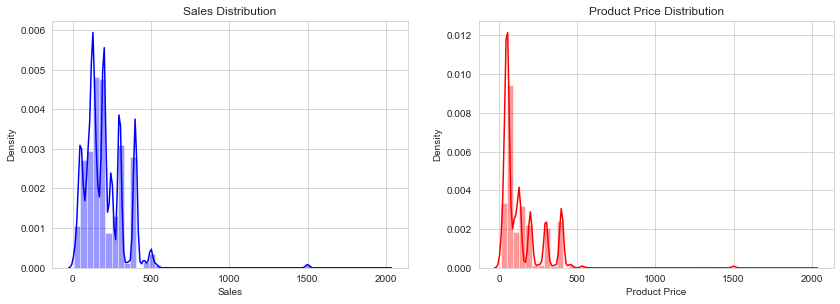

In [41]:
plt.figure(figsize=(14,10))
plt.subplot(2, 2, 1)
plt.title('Sales Distribution')
sns.distplot(df['Sales'], color='blue');
plt.subplot(2, 2, 2)
plt.title('Product Price Distribution')
sns.distplot(df['Product Price'],color='red');

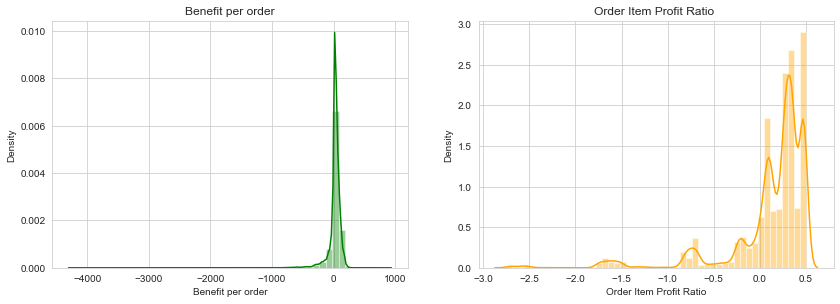

In [42]:
plt.figure(figsize=(14,10))
plt.subplot(2, 2, 1)
plt.title('Benefit per order')
sns.distplot(df['Benefit per order'], color='green');
plt.subplot(2, 2, 2)
plt.title('Order Item Profit Ratio ')
sns.distplot(df['Order Item Profit Ratio'],color='orange');

### Correlation among attributes

<AxesSubplot:>

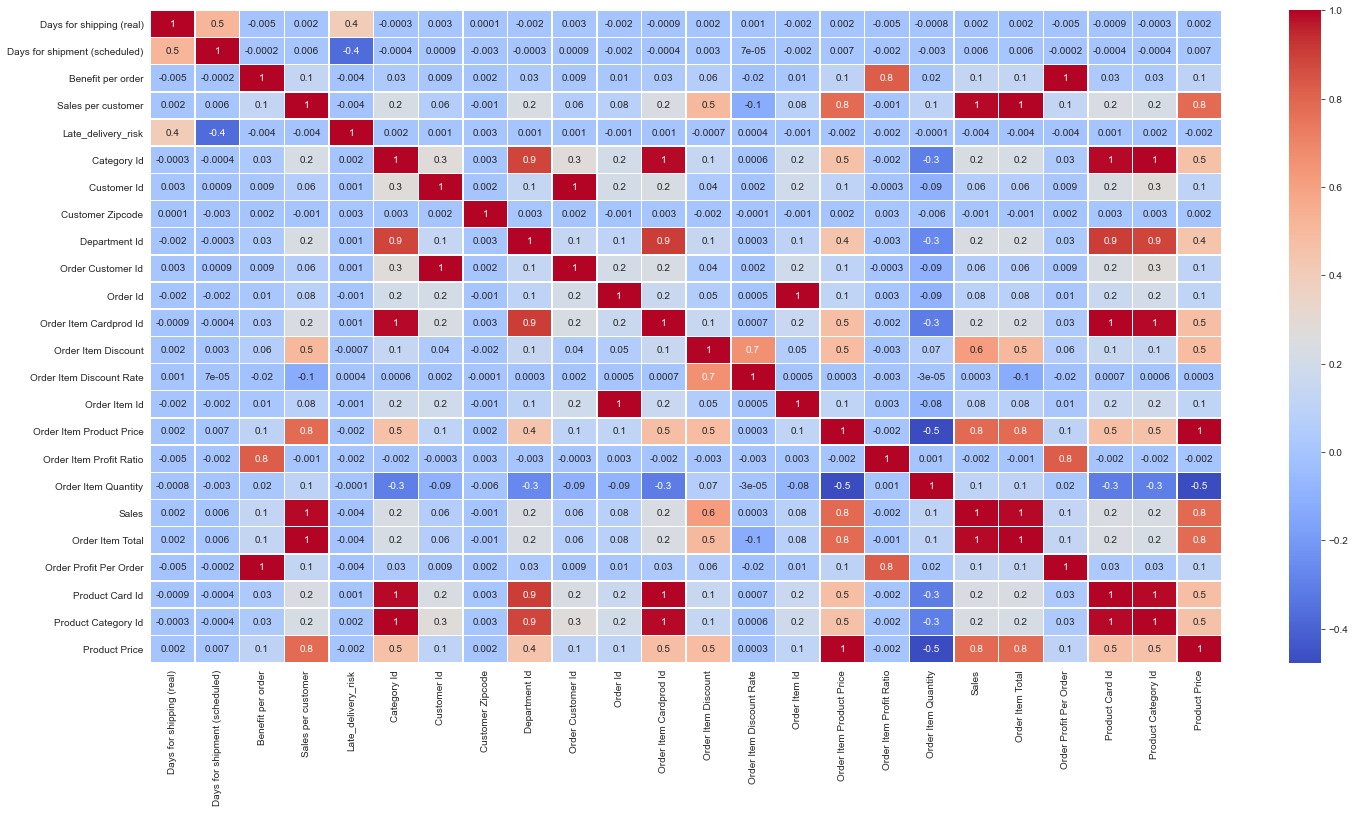

In [43]:
fig, ax = plt.subplots(figsize=(24,12))         
sns.heatmap(data.corr(),annot=True,linewidths=.5,fmt='.1g',cmap= 'coolwarm') 

In [44]:
#There are some attributes which contain exactly same values and detected correlation denoted by '1'. so we kept one attribute and dropping other duplicate one.

In [45]:
data.drop(['Sales per customer', 'Order Customer Id', 'Order Item Cardprod Id','Order Item Id','Order Item Total','Order Profit Per Order','Product Card Id','Product Category Id'], axis=1, inplace=True)

In [46]:
data.drop(['Order Item Product Price'], axis=1, inplace=True)

<AxesSubplot:>

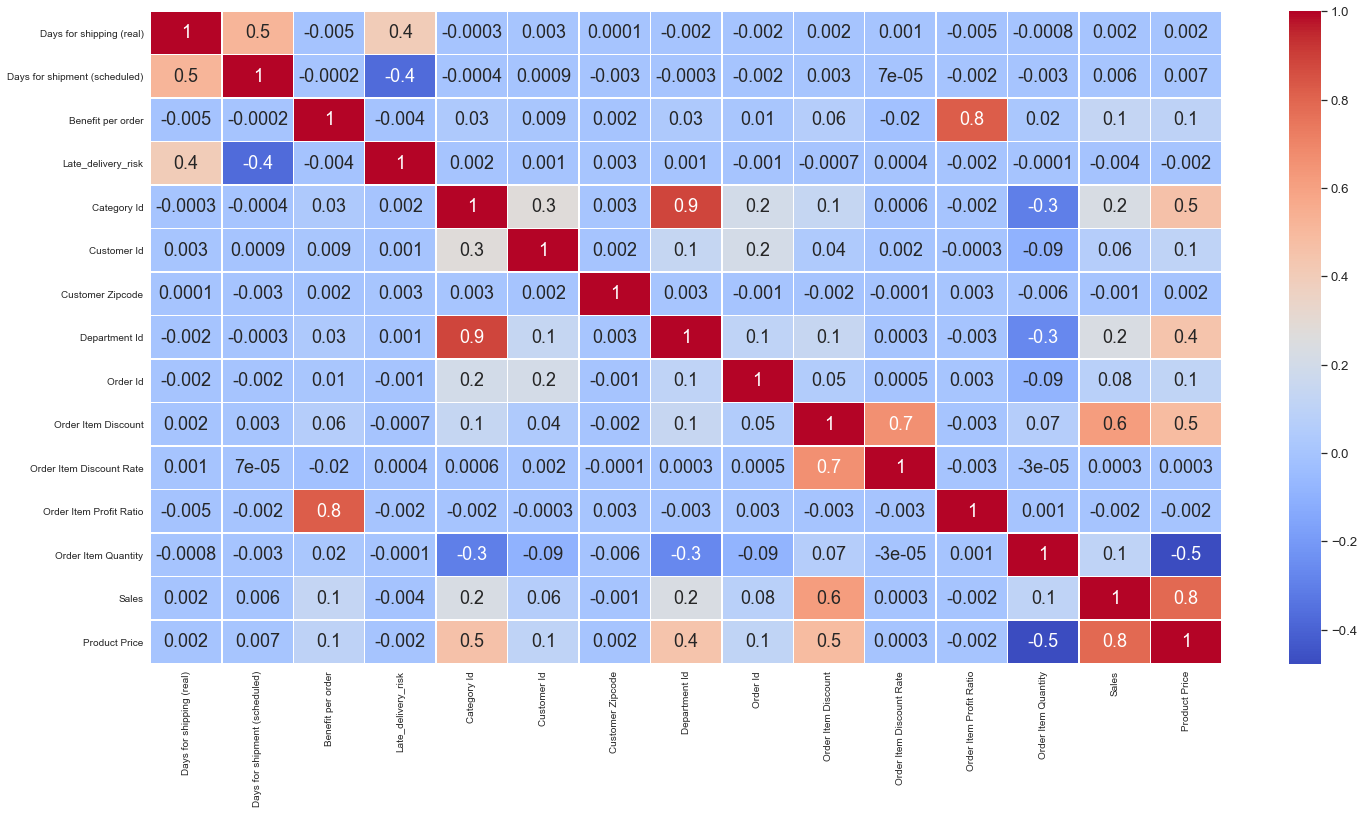

In [47]:
fig, ax = plt.subplots(figsize=(24,12))
sns.set(font_scale=1.2)
sns.heatmap(data.corr(),annot=True,linewidths=.5,fmt='.1g',cmap= 'coolwarm',annot_kws={"size": 18}) 

### Univariate Analysis

Target variable 'Sales'
 - Strong positive correlation: 'Order Item Discount' (0.6), 'Order Item Product Price'(0.8), 'Product Price' (0.8)
 - weak negative correlation: 'Order Item Profit Ratio' (-0.002)

## Bivariate Analysis

In [48]:
data.head(6).transpose()

,0,1,2,3,4,5
Type,DEBIT,TRANSFER,CASH,DEBIT,PAYMENT,TRANSFER
Days for shipping (real),3,5,4,3,2,6
Days for shipment (scheduled),4,4,4,4,4,4
Benefit per order,91.25,-249.09,-247.78,22.86,134.21,18.58
Delivery Status,Advance shipping,Late delivery,Shipping on time,Advance shipping,Advance shipping,Shipping canceled
Late_delivery_risk,0,1,0,0,0,0
Category Id,73,73,73,73,73,73
Category Name,Sporting Goods,Sporting Goods,Sporting Goods,Sporting Goods,Sporting Goods,Sporting Goods
Customer City,Caguas,Caguas,San Jose,Los Angeles,Caguas,Tonawanda
Customer Country,Puerto Rico,Puerto Rico,EE. UU.,EE. UU.,Puerto Rico,EE. UU.


<AxesSubplot:title={'center':'Total sales for all regions'}, xlabel='Order Region'>

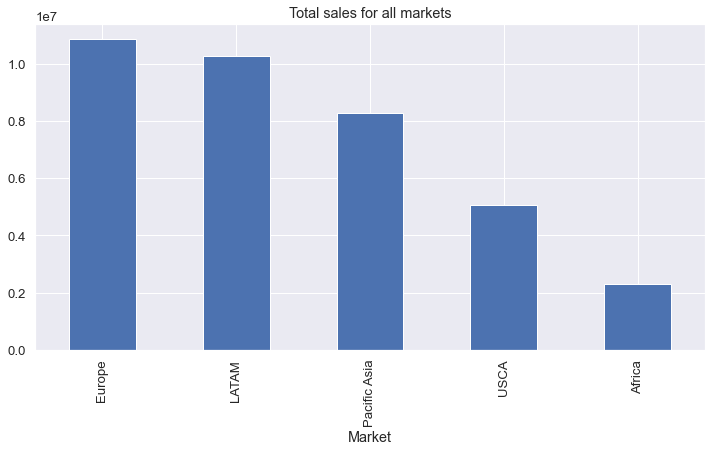

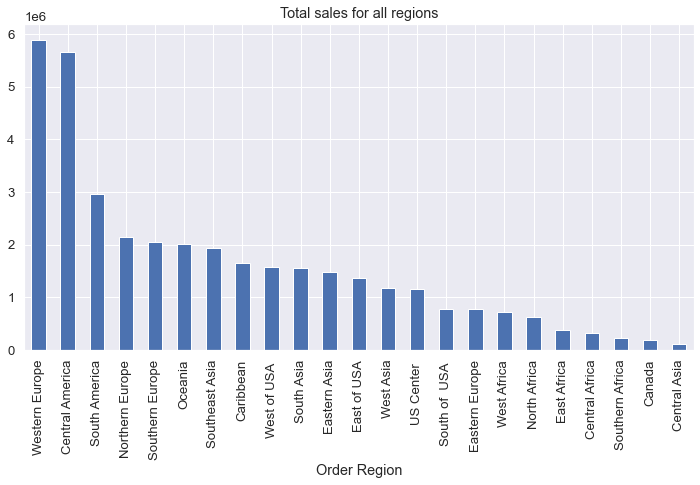

In [49]:
market = data.groupby('Market') 
region = data.groupby('Order Region')
plt.figure(1)
market['Sales'].sum().sort_values(ascending=False).plot.bar(figsize=(12,6), title="Total sales for all markets")
plt.figure(2)
region['Sales'].sum().sort_values(ascending=False).plot.bar(figsize=(12,6), title="Total sales for all regions")

Findings:

The graph shows that the European market has the highest number of sales, while Africa has the lowest. Western Europe and Central America had the largest sales in these markets.

Which product category has the most sales?
The same strategy can be used to determine which product category has the most sales.

### Product price vs Sales:

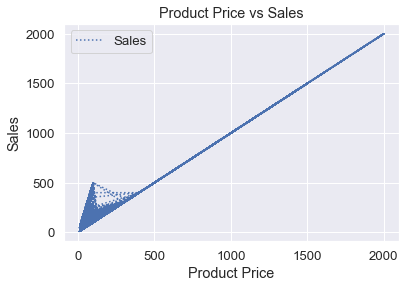

In [50]:
data.plot(x='Product Price', y='Sales',linestyle='dotted',
     markerfacecolor='blue', markersize=12) 
plt.title('Product Price vs Sales')#title
plt.xlabel('Product Price')  # X-axis title
plt.ylabel('Sales') # Y=axis title
plt.show()

In [51]:
data['order_year']= pd.DatetimeIndex(data['order date (DateOrders)']).year
data['order_month'] = pd.DatetimeIndex(data['order date (DateOrders)']).month
data['order_week_day'] = pd.DatetimeIndex(data['order date (DateOrders)']).weekday
data['order_hour'] = pd.DatetimeIndex(data['order date (DateOrders)']).hour
data['order_month_year'] = pd.to_datetime(data['order date (DateOrders)']).dt.to_period('M')

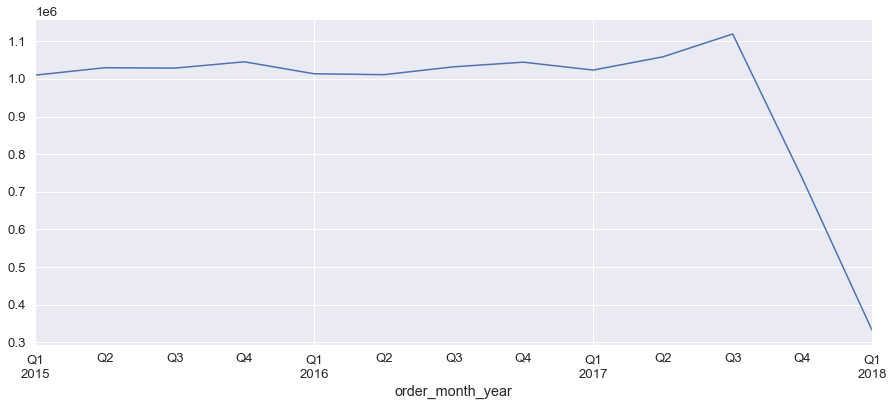

In [52]:
quater= data.groupby('order_month_year')
quartersales=quater['Sales'].sum().resample('Q').mean().plot(figsize=(15,6))

By seeing above graph it can be seen that sales are consistent from Q1 2015 until Q3 of 2017 and suddenly dipped by Q1 2018. 

##### Investigate purchase trend over time

In [53]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Data columns (total 38 columns):
 #   Column                         Non-Null Count   Dtype    
---  ------                         --------------   -----    
 0   Type                           180519 non-null  object   
 1   Days for shipping (real)       180519 non-null  int64    
 2   Days for shipment (scheduled)  180519 non-null  int64    
 3   Benefit per order              180519 non-null  float64  
 4   Delivery Status                180519 non-null  object   
 5   Late_delivery_risk             180519 non-null  int64    
 6   Category Id                    180519 non-null  int64    
 7   Category Name                  180519 non-null  object   
 8   Customer City                  180519 non-null  object   
 9   Customer Country               180519 non-null  object   
 10  Customer Id                    180519 non-null  int64    
 11  Customer Segment               180519 non-null  object   
 12  Cu

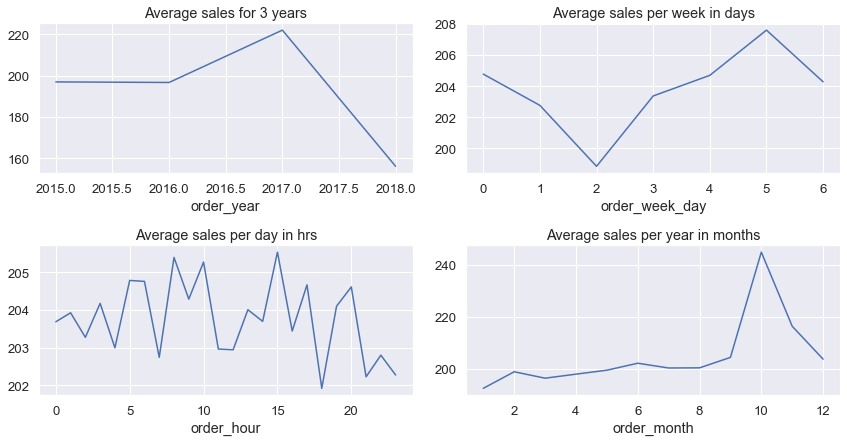

In [54]:
plt.figure(figsize=(10,12))
plt.subplot(4, 2, 1)
quater= data.groupby('order_year')
quater['Sales'].mean().plot(figsize=(12,12),title='Average sales for 3 years')
plt.subplot(4, 2, 2)
days=data.groupby("order_week_day")
days['Sales'].mean().plot(figsize=(12,12),title='Average sales per week in days')
plt.subplot(4, 2, 3)
hrs=data.groupby("order_hour")
hrs['Sales'].mean().plot(figsize=(12,12),title='Average sales per day in hrs')
plt.subplot(4, 2, 4)
mnth=data.groupby('order_month')
#a=data.groupby("Market")
mnth['Sales'].mean().plot(figsize=(12,12),title='Average sales per year in months')
plt.tight_layout()
plt.show()

The most number of orders came in October followed by November, and orders for all other months are consistent.Highest number of orders are placed by customers in 2017. Saturday recorded highest number of average sales and wednesday with the least number of sales. The average sales are consistent throughout the day irrespective of time with std of 3.

In [55]:
data['fraud'] = np.where(data['Order Status'] == 'SUSPECTED_FRAUD', 1, 0)
data['late_delivery']=np.where(data['Delivery Status'] == 'Late delivery', 1, 0)

In [56]:
#Dropping columns with repeated values
data.drop(['Delivery Status','Late_delivery_risk','Order Status','order_month_year','order date (DateOrders)'], axis=1, inplace=True)

In [57]:
data.to_csv('dataset_after_analysis.csv')